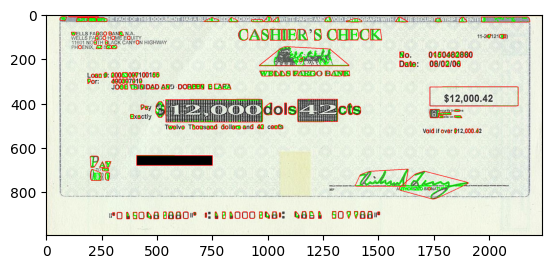

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('Cheque.jpeg')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold image to create a binary mask
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary mask
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours
min_area = 100
contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Find convex hulls of remaining contours
hulls = [cv2.convexHull(c) for c in contours]

# Draw contours and hulls on original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
cv2.drawContours(img, hulls, -1, (0, 0, 255), 2)

# Convert OpenCV image to NumPy array
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot image using Matplotlib
plt.imshow(img_rgb)
plt.show()
